## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0712 07:08:00.647428  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 07:08:00.679171  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:08:00.685619  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 07:08:00.750909  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 07:08:00.756860  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 07:08:00.853725  7480 deprecation.py:323] From C:\Users\jerry\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 07:08:00.995581  7480 deprecation_wrapper.py:119] From C:\Users\jerry\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.9437 - acc: 0.3045 - val_loss: 1.7778 - val_acc: 0.3680
Epoch 2/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.7043 - acc: 0.3906 - val_loss: 1.7105 - val_acc: 0.3926
Epoch 3/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.6168 - acc: 0.4232 - val_loss: 1.5781 - val_acc: 0.4371
Epoch 4/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.5541 - acc: 0.4466 - val_loss: 1.5718 - val_acc: 0.4442
Epoch 5/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.5064 - acc: 0.4624 - val_loss: 1.5236 - val_acc: 0.4572
Epoch 6/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.4537 - acc: 0.4824 - val_loss: 1.4856 - val_acc: 0.4675
Epoch 7/500
50000/50000 [==============================] - 7s 150us/step - loss: 1.4304 - acc: 0.4885 - val_loss: 1.

50000/50000 [==============================] - 10s 190us/step - loss: 0.5363 - acc: 0.8079 - val_loss: 2.0508 - val_acc: 0.5150
Epoch 60/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.5157 - acc: 0.8135 - val_loss: 2.0830 - val_acc: 0.5028
Epoch 61/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.5080 - acc: 0.8165 - val_loss: 2.1009 - val_acc: 0.5147
Epoch 62/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.5006 - acc: 0.8194 - val_loss: 2.1826 - val_acc: 0.5049
Epoch 63/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.5088 - acc: 0.8167 - val_loss: 2.1142 - val_acc: 0.5083
Epoch 64/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.4730 - acc: 0.8289 - val_loss: 2.1512 - val_acc: 0.5153
Epoch 65/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.4666 - acc: 0.8332 - val_loss: 2.2095 - val_acc: 0.5078
Epoch 66/500
50000/50000 [======

50000/50000 [==============================] - 9s 172us/step - loss: 0.2210 - acc: 0.9201 - val_loss: 3.3850 - val_acc: 0.5030
Epoch 118/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.2258 - acc: 0.9184 - val_loss: 3.4890 - val_acc: 0.4973
Epoch 119/500
50000/50000 [==============================] - 8s 162us/step - loss: 0.2378 - acc: 0.9125 - val_loss: 3.5361 - val_acc: 0.4958
Epoch 120/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.2481 - acc: 0.9103 - val_loss: 3.5299 - val_acc: 0.4935
Epoch 121/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.2447 - acc: 0.9122 - val_loss: 3.5510 - val_acc: 0.4897
Epoch 122/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.1853 - acc: 0.9338 - val_loss: 3.5589 - val_acc: 0.4965
Epoch 123/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.2185 - acc: 0.9221 - val_loss: 3.5746 - val_acc: 0.4963
Epoch 124/500
50000/50000 

50000/50000 [==============================] - 8s 156us/step - loss: 0.1474 - acc: 0.9485 - val_loss: 4.4561 - val_acc: 0.4865
Epoch 176/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.1753 - acc: 0.9384 - val_loss: 4.1671 - val_acc: 0.4938
Epoch 177/500
50000/50000 [==============================] - 8s 166us/step - loss: 0.1658 - acc: 0.9417 - val_loss: 4.2671 - val_acc: 0.4956
Epoch 178/500
50000/50000 [==============================] - 7s 148us/step - loss: 0.1145 - acc: 0.9592 - val_loss: 4.1692 - val_acc: 0.5010
Epoch 179/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.1541 - acc: 0.9458 - val_loss: 4.3013 - val_acc: 0.4863
Epoch 180/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.2931 - acc: 0.9042 - val_loss: 4.2074 - val_acc: 0.4918
Epoch 181/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.1692 - acc: 0.9400 - val_loss: 4.3167 - val_acc: 0.4895
Epoch 182/500
50000/50000

50000/50000 [==============================] - 13s 263us/step - loss: 0.1507 - acc: 0.9485 - val_loss: 4.6559 - val_acc: 0.4928
Epoch 233/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.1333 - acc: 0.9538 - val_loss: 4.6259 - val_acc: 0.4925
Epoch 234/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.1636 - acc: 0.9444 - val_loss: 4.6716 - val_acc: 0.4902
Epoch 235/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.1642 - acc: 0.9453 - val_loss: 4.5880 - val_acc: 0.4974
Epoch 236/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.1276 - acc: 0.9551 - val_loss: 4.7734 - val_acc: 0.4872
Epoch 237/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.1300 - acc: 0.9556 - val_loss: 4.5860 - val_acc: 0.4976
Epoch 238/500
50000/50000 [==============================] - 15s 292us/step - loss: 0.0970 - acc: 0.9663 - val_loss: 4.6759 - val_acc: 0.4877
Epoch 239/500
50000/

Epoch 290/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1256 - acc: 0.9585 - val_loss: 4.9158 - val_acc: 0.4919
Epoch 291/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1545 - acc: 0.9498 - val_loss: 4.8452 - val_acc: 0.4963
Epoch 292/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.0897 - acc: 0.9682 - val_loss: 4.8295 - val_acc: 0.4962
Epoch 293/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1003 - acc: 0.9659 - val_loss: 4.9673 - val_acc: 0.4903
Epoch 294/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1526 - acc: 0.9488 - val_loss: 4.9650 - val_acc: 0.4888
Epoch 295/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.1126 - acc: 0.9621 - val_loss: 4.9312 - val_acc: 0.4926
Epoch 296/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.0845 - acc: 0.9705 - val_loss: 4.9231 - val_acc: 0.4921
Epoch 

Epoch 348/500
50000/50000 [==============================] - 13s 270us/step - loss: 0.1154 - acc: 0.9620 - val_loss: 5.1261 - val_acc: 0.4910
Epoch 349/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.1443 - acc: 0.9550 - val_loss: 5.1452 - val_acc: 0.4914
Epoch 350/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.0630 - acc: 0.9783 - val_loss: 5.1150 - val_acc: 0.4906
Epoch 351/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.0631 - acc: 0.9782 - val_loss: 5.0458 - val_acc: 0.4976
Epoch 352/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.0752 - acc: 0.9745 - val_loss: 5.0998 - val_acc: 0.4974
Epoch 353/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.0491 - acc: 0.9830 - val_loss: 5.0959 - val_acc: 0.5031
Epoch 354/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1532 - acc: 0.9518 - val_loss: 5.2131 - val_acc: 0.4789
Epoch 

Epoch 406/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1183 - acc: 0.9623 - val_loss: 5.2085 - val_acc: 0.4923
Epoch 407/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0753 - acc: 0.9751 - val_loss: 5.2300 - val_acc: 0.4860
Epoch 408/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1124 - acc: 0.9642 - val_loss: 5.2783 - val_acc: 0.4880
Epoch 409/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.1372 - acc: 0.9579 - val_loss: 5.2462 - val_acc: 0.4926
Epoch 410/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0489 - acc: 0.9838 - val_loss: 5.2353 - val_acc: 0.4956
Epoch 411/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0517 - acc: 0.9819 - val_loss: 5.2943 - val_acc: 0.4892
Epoch 412/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0850 - acc: 0.9724 - val_loss: 5.2942 - val_acc: 0.4897
Epoch 413/500

50000/50000 [==============================] - 7s 142us/step - loss: 0.0190 - acc: 0.9943 - val_loss: 5.2140 - val_acc: 0.4958
Epoch 465/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0078 - acc: 0.9982 - val_loss: 5.2121 - val_acc: 0.4998
Epoch 466/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0050 - acc: 0.9992 - val_loss: 5.2325 - val_acc: 0.5012
Epoch 467/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0029 - acc: 0.9997 - val_loss: 5.2714 - val_acc: 0.5012
Epoch 468/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0024 - acc: 0.9998 - val_loss: 5.2877 - val_acc: 0.5012
Epoch 469/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 5.2987 - val_acc: 0.5004
Epoch 470/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 5.3137 - val_acc: 0.5027
Epoch 471/500
50000/50000 [

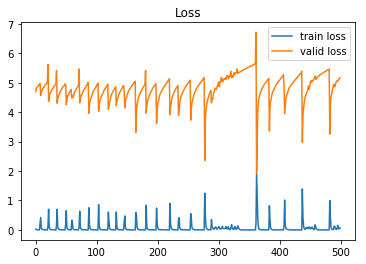

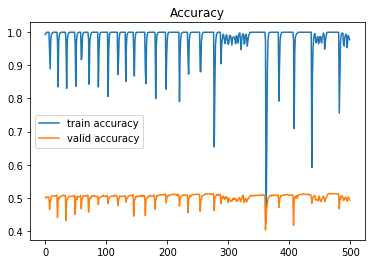

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0537 - acc: 0.9823 - val_loss: 5.0947 - val_acc: 0.4973
Epoch 2/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0331 - acc: 0.9893 - val_loss: 5.0888 - val_acc: 0.4980
Epoch 3/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0243 - acc: 0.9924 - val_loss: 5.0877 - val_acc: 0.4982
Epoch 4/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0194 - acc: 0.9947 - val_loss: 5.0905 - val_acc: 0.4987
Epoch 5/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0160 - acc: 0.9958 - val_loss: 5.0927 - val_acc: 0.4991
Epoch 6/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0138 - acc: 0.9967 - val_loss: 5.0959 - val_acc: 0.4998
Epoch 7/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 5.

50000/50000 [==============================] - 6s 113us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.1923 - val_acc: 0.5026
Epoch 60/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.1935 - val_acc: 0.5025
Epoch 61/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.1949 - val_acc: 0.5025
Epoch 62/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.1958 - val_acc: 0.5025
Epoch 63/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.1971 - val_acc: 0.5018
Epoch 64/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.1982 - val_acc: 0.5021
Epoch 65/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.1992 - val_acc: 0.5020
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 6s 118us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2461 - val_acc: 0.5026
Epoch 118/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2467 - val_acc: 0.5027
Epoch 119/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2474 - val_acc: 0.5026
Epoch 120/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2482 - val_acc: 0.5027
Epoch 121/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2489 - val_acc: 0.5026
Epoch 122/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2497 - val_acc: 0.5028
Epoch 123/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 5.2503 - val_acc: 0.5027
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 108us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2825 - val_acc: 0.5032
Epoch 176/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2831 - val_acc: 0.5031
Epoch 177/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2837 - val_acc: 0.5030
Epoch 178/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2841 - val_acc: 0.5032
Epoch 179/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2847 - val_acc: 0.5032
Epoch 180/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2852 - val_acc: 0.5032
Epoch 181/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.2858 - val_acc: 0.5033
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 5s 104us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3110 - val_acc: 0.5028
Epoch 234/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3114 - val_acc: 0.5028
Epoch 235/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3119 - val_acc: 0.5029
Epoch 236/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3123 - val_acc: 0.5028
Epoch 237/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3127 - val_acc: 0.5028
Epoch 238/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3132 - val_acc: 0.5029
Epoch 239/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 5.3136 - val_acc: 0.5029
Epoch 240/500
50000/50000 [

Epoch 291/500
50000/50000 [==============================] - 5s 99us/step - loss: 9.6602e-04 - acc: 1.0000 - val_loss: 5.3344 - val_acc: 0.5029
Epoch 292/500
50000/50000 [==============================] - 7s 130us/step - loss: 9.6408e-04 - acc: 1.0000 - val_loss: 5.3348 - val_acc: 0.5030
Epoch 293/500
50000/50000 [==============================] - 6s 114us/step - loss: 9.6222e-04 - acc: 1.0000 - val_loss: 5.3352 - val_acc: 0.5031
Epoch 294/500
50000/50000 [==============================] - 6s 114us/step - loss: 9.6029e-04 - acc: 1.0000 - val_loss: 5.3356 - val_acc: 0.5032
Epoch 295/500
50000/50000 [==============================] - 7s 149us/step - loss: 9.5841e-04 - acc: 1.0000 - val_loss: 5.3360 - val_acc: 0.5032
Epoch 296/500
50000/50000 [==============================] - 6s 123us/step - loss: 9.5651e-04 - acc: 1.0000 - val_loss: 5.3363 - val_acc: 0.5032
Epoch 297/500
50000/50000 [==============================] - 6s 118us/step - loss: 9.5465e-04 - acc: 1.0000 - val_loss: 5.3367 - va

50000/50000 [==============================] - 5s 100us/step - loss: 8.7102e-04 - acc: 1.0000 - val_loss: 5.3541 - val_acc: 0.5035
Epoch 348/500
50000/50000 [==============================] - 5s 100us/step - loss: 8.6953e-04 - acc: 1.0000 - val_loss: 5.3545 - val_acc: 0.5035
Epoch 349/500
50000/50000 [==============================] - 5s 103us/step - loss: 8.6803e-04 - acc: 1.0000 - val_loss: 5.3548 - val_acc: 0.5036
Epoch 350/500
50000/50000 [==============================] - 5s 104us/step - loss: 8.6654e-04 - acc: 1.0000 - val_loss: 5.3551 - val_acc: 0.5035
Epoch 351/500
50000/50000 [==============================] - 5s 101us/step - loss: 8.6506e-04 - acc: 1.0000 - val_loss: 5.3554 - val_acc: 0.5035
Epoch 352/500
50000/50000 [==============================] - 5s 105us/step - loss: 8.6365e-04 - acc: 1.0000 - val_loss: 5.3557 - val_acc: 0.5035
Epoch 353/500
50000/50000 [==============================] - 5s 103us/step - loss: 8.6214e-04 - acc: 1.0000 - val_loss: 5.3561 - val_acc: 0.5035

50000/50000 [==============================] - 5s 103us/step - loss: 7.9606e-04 - acc: 1.0000 - val_loss: 5.3715 - val_acc: 0.5031
Epoch 404/500
50000/50000 [==============================] - 5s 104us/step - loss: 7.9484e-04 - acc: 1.0000 - val_loss: 5.3717 - val_acc: 0.5032
Epoch 405/500
50000/50000 [==============================] - 5s 101us/step - loss: 7.9365e-04 - acc: 1.0000 - val_loss: 5.3720 - val_acc: 0.5031
Epoch 406/500
50000/50000 [==============================] - 5s 104us/step - loss: 7.9248e-04 - acc: 1.0000 - val_loss: 5.3723 - val_acc: 0.5031
Epoch 407/500
50000/50000 [==============================] - 5s 101us/step - loss: 7.9128e-04 - acc: 1.0000 - val_loss: 5.3726 - val_acc: 0.5031
Epoch 408/500
50000/50000 [==============================] - 5s 102us/step - loss: 7.9009e-04 - acc: 1.0000 - val_loss: 5.3729 - val_acc: 0.5029
Epoch 409/500
50000/50000 [==============================] - 5s 107us/step - loss: 7.8896e-04 - acc: 1.0000 - val_loss: 5.3732 - val_acc: 0.5029

50000/50000 [==============================] - 6s 119us/step - loss: 7.3541e-04 - acc: 1.0000 - val_loss: 5.3871 - val_acc: 0.5034
Epoch 460/500
50000/50000 [==============================] - 6s 120us/step - loss: 7.3442e-04 - acc: 1.0000 - val_loss: 5.3873 - val_acc: 0.5035
Epoch 461/500
50000/50000 [==============================] - 6s 122us/step - loss: 7.3343e-04 - acc: 1.0000 - val_loss: 5.3876 - val_acc: 0.5034
Epoch 462/500
50000/50000 [==============================] - 5s 105us/step - loss: 7.3246e-04 - acc: 1.0000 - val_loss: 5.3878 - val_acc: 0.5035
Epoch 463/500
50000/50000 [==============================] - 6s 123us/step - loss: 7.3149e-04 - acc: 1.0000 - val_loss: 5.3881 - val_acc: 0.5036
Epoch 464/500
50000/50000 [==============================] - 6s 110us/step - loss: 7.3050e-04 - acc: 1.0000 - val_loss: 5.3884 - val_acc: 0.5035
Epoch 465/500
50000/50000 [==============================] - 5s 107us/step - loss: 7.2957e-04 - acc: 1.0000 - val_loss: 5.3887 - val_acc: 0.5036

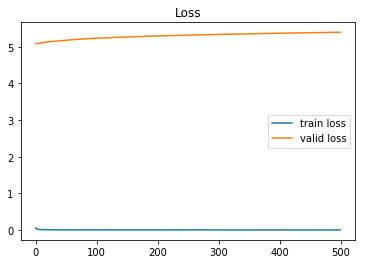

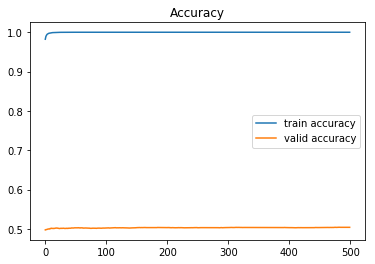

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()